<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: left">
        <a class="navbar-brand" href="0_Index.ipynb" target="_self"> <h2> &uarr; Back to front page</h2></a>
    </div>
  </div>
</nav>

# Exploring an audio file

When audio signals are recorded to a digital medium, this is done by sampling the amplitude of an analog signal (aka. voltage output from a microphone) at regular intervals known as the *sampling period* $T_s$, resulting in a sequence of measured values. An illustration of this process is shown below.

<img src="Figures/Task1_Ts.png" style="width: 600px; margin-left: 100px" />

Closely related to the sampling period $T_s$ is the *sampling rate* or *sampling frequency* $f_s$, defined as the *number of samples per second*. The sampling frequency $f_s$ is calculated simpy by inverting the samping period $T_s$.

$$f_s =\frac{1}{T_s}$$

In order to reconstruct an analog voltage signal which can be sent to speakers or headphones, both knowledge of the sampling frequency used during recording *and* the measured sample values are required. Happily, all this information is contained within any audio file format.

The codecell below uses a function available through the `scipy` module to read the audio file `example_music.wav` containing some relaxing classical music. The sequence of audio amplitude measurements which contain the actual audio signal is assigned to the variable `sampleData` in the form of a very long `array`, while the sampling frequency is an integer value which is assigned to the variable `fs`. 

After loading the audio file, the data is passed along to an embedded Auduio playback widget accessible through the IPython module. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile # Import module for handling of .wav audio files
from IPython.display import Audio   # For loading embedded audio player

fs, sampleData = wavfile.read("sample_audio.wav") # "fs" is sampling frequency, "sampleData" is the sequence of measurements

# Use the following lines to listen to the audio signal
Audio(sampleData, rate=fs)

## a)

Run the codecell and listen to the audio clip. We can now begin our analysis of the audio signal. 

Using the data gathered in the codecell above, write a script which prints the sampling frequency $f_s$, sampling period $T_s$ and the total duration of the audio file. <br>*extra: what is the size of the file in number of bits?*<br> *hint: the function `len()` should be useful here*. 


In [32]:
print(f"{fs=} Ts={round(1/fs,7)} Duration={round(len(sampleData)*1/fs,2)} Bits={len(sampleData)*16}") 

fs=22050 Ts=4.54e-05 Duration=20.34 Bits=7176208


## b)

Use the Audio object to play back the audio clip once with double the sample rate $f_s$, and once with half the sample rate. What effects can you hear? Explain the cause of these effects.


In [26]:
Audio(sampleData, rate=fs*2)

Audio(sampleData, rate=fs/2)

ANSWER THEORY QUESTIONS HERE: Increasing the sample rate increases the pitch, while halfing lowers the pitch. This due to the wave lengths to shortening and lenghtening.

A crucial parameter to be aware of when working with audio is the bit rate of the digital audio signal measured in bps (bits per second).

## c) 

Given each sample having 16 bit resolution, what is the bit rate for the audio recording and what is the total size of the file (assuming no compression)?


In [33]:
print(f"bps={round((len(sampleData)*16)/(len(sampleData)*1/fs),2)} and size={round((len(sampleData)*16)/(8*1024*1024),2)}MB")

bps=352800.0 and size=0.86MB


It is often desirable to provide a graphical plot of the audio signal. Simply passing the `sampleData` to the `plot()` function should acheive this, but the x-axis will show sample index `n` instead of the time `t` in seconds, which may be rather unhelpful. Based on the total number of samples in the audio clip and the sampling rate, we can adjust the plot to show signal amplitude as a function of time $t$ in seconds by creating a new array (e.g. `t`) of equal length to our audio signal which spans the duration of our audio signal.

For example, given an audio file with $N$ samples and sampling rate $f_s$, what we want is an array `t` with `N` elements linearly spaced in the time span $0 \leq t < \frac{N}{f_s}$.

## d)

Write the code to generate this plot in the codecell below. `numpy.array`, `numpy.arange` and `numpy.linspace` can all be used here. If done correctly, the resulting figure should look something like [this](Figures/audio_plot.png).


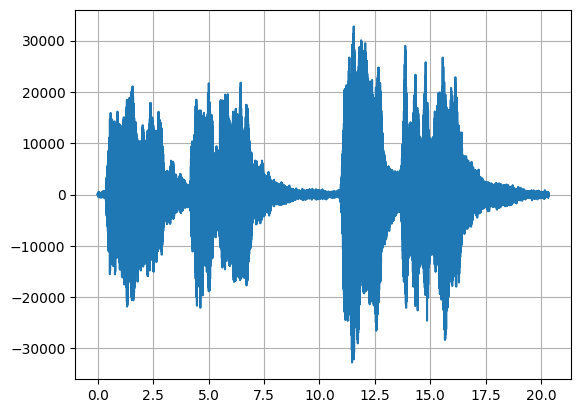

In [45]:
x = np.arange(0,len(sampleData),1)
customX = np.linspace(0,(len(sampleData)*1/fs),num=len(sampleData))

import matplotlib.pyplot as plt

plt.plot(customX, sampleData)
plt.grid()
plt.show()

<br>
<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header" style="float: right">
        <a class="navbar-brand" href="2_processing_audio.ipynb" target="_self">Next page: <i>Processing audio signals</i> &gt;</a>
    </div>
  </div>
</nav>